In [ ]:
import numpy as np 
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving bbc-text (2) (2).csv to bbc-text (2) (2).csv


In [ ]:
df = pd.read_csv('/content/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
no_of_classes = set(df['category'])
no_of_classes

{'business', 'entertainment', 'politics', 'sport', 'tech'}

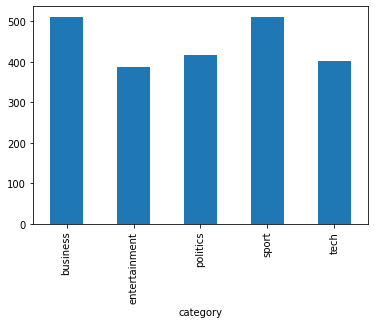

In [ ]:
#Analyzing data
df.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
#cleaning dataset
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
df

,category,text,cleaned
0,tech,tv future in the hands of viewers with home th...,tv futur in the hand of viewer with home theat...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari of farrel gambl leicest say they wi...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl in fa cup premiership side ...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelv raid box offic ocean s twelv the...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,car pull down us retail figur us retail sale f...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveil immigr polici ex chatshow host r...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announc new glasgow concert us band rem ha...
2223,politics,how political squabbles snowball it s become c...,how polit squabbl snowbal it s becom commonpla...


In [ ]:
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
words = stopwords.words("nepali")
words

['छ',
 'र',
 'पनि',
 'छन्',
 'लागि',
 'भएको',
 'गरेको',
 'भने',
 'गर्न',
 'गर्ने',
 'हो',
 'तथा',
 'यो',
 'रहेको',
 'उनले',
 'थियो',
 'हुने',
 'गरेका',
 'थिए',
 'गर्दै',
 'तर',
 'नै',
 'को',
 'मा',
 'हुन्',
 'भन्ने',
 'हुन',
 'गरी',
 'त',
 'हुन्छ',
 'अब',
 'के',
 'रहेका',
 'गरेर',
 'छैन',
 'दिए',
 'भए',
 'यस',
 'ले',
 'गर्नु',
 'औं',
 'सो',
 'त्यो',
 'कि',
 'जुन',
 'यी',
 'का',
 'गरि',
 'ती',
 'न',
 'छु',
 'छौं',
 'लाई',
 'नि',
 'उप',
 'अक्सर',
 'आदि',
 'कसरी',
 'क्रमशः',
 'चाले',
 'अगाडी',
 'अझै',
 'अनुसार',
 'अन्तर्गत',
 'अन्य',
 'अन्यत्र',
 'अन्यथा',
 'अरु',
 'अरुलाई',
 'अर्को',
 'अर्थात',
 'अर्थात्',
 'अलग',
 'आए',
 'आजको',
 'ओठ',
 'आत्म',
 'आफू',
 'आफूलाई',
 'आफ्नै',
 'आफ्नो',
 'आयो',
 'उदाहरण',
 'उनको',
 'उहालाई',
 'एउटै',
 'एक',
 'एकदम',
 'कतै',
 'कम से कम',
 'कसै',
 'कसैले',
 'कहाँबाट',
 'कहिलेकाहीं',
 'का',
 'किन',
 'किनभने',
 'कुनै',
 'कुरा',
 'कृपया',
 'केही',
 'कोही',
 'गए',
 'गरौं',
 'गर्छ',
 'गर्छु',
 'गर्नुपर्छ',
 'गयौ',
 'गैर',
 'चार',
 'चाहनुहुन्छ',
 'चाहन्छु',
 'चाहिए

In [ ]:
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
df

,category,text,cleaned
0,tech,tv future in the hands of viewers with home th...,tv futur in the hand of viewer with home theat...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari of farrel gambl leicest say they wi...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl in fa cup premiership side ...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelv raid box offic ocean s twelv the...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,car pull down us retail figur us retail sale f...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveil immigr polici ex chatshow host r...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announc new glasgow concert us band rem ha...
2223,politics,how political squabbles snowball it s become c...,how polit squabbl snowbal it s becom commonpla...


In [ ]:
df

,category,text,cleaned
0,tech,tv future in the hands of viewers with home th...,tv futur in the hand of viewer with home theat...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari of farrel gambl leicest say they wi...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl in fa cup premiership side ...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelv raid box offic ocean s twelv the...
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,car pull down us retail figur us retail sale f...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveil immigr polici ex chatshow host r...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announc new glasgow concert us band rem ha...
2223,politics,how political squabbles snowball it s become c...,how polit squabbl snowbal it s becom commonpla...


In [ ]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))

X = df['cleaned']
Y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25) #Splitting dataset

#Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=0))])
#Training model
model = pipeline.fit(X_train, y_train)

#Creating pickle file
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
X_test

283     plan to give elderli care control elderli and ...
1015    murray return to scotland fold euan murray ha ...
838     spain coach face racism inquiri spain s footba...
26      career honour for actor dicaprio actor leonard...
6       blair prepar to name poll date toni blair is l...
                              ...                        
1698    chip maker back net phone call rich templeton ...
1225    million to lose textil job million of the worl...
1492    x factor show get second seri tv talent show t...
1202    what now for british tenni tim henman s decis ...
804     yachvili savour franc comeback franc scrum hal...
Name: cleaned, Length: 557, dtype: object

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
print(accuracy_score(y_test,predict))
print('\n')
print(predict)

0.9748653500897666


['politics' 'sport' 'sport' 'entertainment' 'politics' 'business'
 'politics' 'sport' 'politics' 'tech' 'tech' 'business' 'sport' 'sport'
 'politics' 'tech' 'politics' 'business' 'business' 'tech' 'sport'
 'entertainment' 'business' 'politics' 'tech' 'sport' 'entertainment'
 'sport' 'tech' 'sport' 'entertainment' 'politics' 'tech' 'sport'
 'politics' 'sport' 'entertainment' 'tech' 'entertainment' 'politics'
 'business' 'sport' 'business' 'sport' 'business' 'business' 'politics'
 'business' 'sport' 'sport' 'tech' 'sport' 'sport' 'business' 'business'
 'entertainment' 'business' 'entertainment' 'business' 'entertainment'
 'tech' 'politics' 'sport' 'politics' 'business' 'sport' 'business'
 'business' 'entertainment' 'politics' 'sport' 'business' 'tech'
 'politics' 'sport' 'politics' 'entertainment' 'sport' 'business'
 'politics' 'politics' 'sport' 'sport' 'business' 'entertainment' 'tech'
 'politics' 'sport' 'business' 'tech' 'business' 'tech' 'politics'
 'entertainme

In [ ]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

               precision    recall  f1-score   support

     business       0.95      0.97      0.96       128
entertainment       0.99      0.98      0.98        88
     politics       0.97      0.96      0.97       104
        sport       0.99      1.00      0.99       132
         tech       0.98      0.96      0.97       105

     accuracy                           0.97       557
    macro avg       0.98      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557

[[124   0   3   1   0]
 [  1  86   0   0   1]
 [  2   1 100   0   1]
 [  0   0   0 132   0]
 [  3   0   0   1 101]]


In [ ]:
# #define metrics
# import matplotlib.pyplot as plt
# from sklearn import metrics
# from sklearn.metrics import roc_auc_score

# # log_regression.fit(X_train,y_train)

# y_pred_proba = model.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label=5)
# # roc_auc = metrics.roc_auc_score(y_test,y_pred_proba)

# #create ROC curve
# plt.plot(fpr,tpr)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
# plt.show()